In [1]:
import os
path = os.path.join('/home/scuervo91/dev/reservoirpy')
import sys
sys.path.insert(0,path)

import numpy as np
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from reservoirpy.wellproductivitypy import decline as dc
from reservoirpy.wellpy import path as ph
import pyDOE2 as ed

In [2]:
periods=pd.period_range(start=date(2021,1,1),end=date(2035,1,1),freq='A')
price = pd.Series(np.full(periods.shape,50/1000), index = periods, name='time')


In [3]:
pr1 = ph.well(name='pr-1',fq='M')


p90 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0, di=0.4, ti=date(2021,1,1),
                                     econ_limit=1000, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-4000,
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
        
    
    },
    'wo':{
        'declination':dc.declination(qi=3000, b=0, di=0.4, ti=date(2021,1,1),
                                     econ_limit=200, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-400,
        'depend_start':'initial',
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    
    }
}

p50 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0.5, di=0.4, ti=date(2021,1,1),
                                     econ_limit=1000, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-4000,
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    
    },
    'wo':{
        'declination':dc.declination(qi=3000, b=0.5, di=0.4, ti=date(2021,1,1),
                                     econ_limit=200, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-400,
        'depend_start':'initial',
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    
    }
}

p10 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=1, di=0.4, ti=date(2021,1,1),
                                     econ_limit=1000, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-4000,
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    
    },
    'wo':{
        'declination':dc.declination(qi=3000, b=1, di=0.4, ti=date(2021,1,1),
                                     econ_limit=200, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-400,
        'depend_start':'initial',
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    
    }
}


pr1.add_schedule(
    {
        'p90':p90,
        'p50':p50,
        'p10':p10
    }
)



In [4]:
f1 = pr1.schedule_forecast(fq_output='A')
f1

,case,period,time,qo,vo,np,datetime,well
0,p10,initial,2021,2524.716356,921521.47,921521.45,2021-01-01,pr-1
1,p10,initial,2022,1885.510795,688211.44,1609732.85,2022-01-01,pr-1
2,p10,initial,2023,1505.445479,549487.60,2159220.42,2023-01-01,pr-1
3,p10,initial,2024,1252.921503,458569.27,2617789.74,2024-01-01,pr-1
4,p10,initial,2025,1073.447107,389661.30,3007451.02,2025-01-01,pr-1
5,p10,wo,2026,2483.269408,839345.06,839345.04,2026-01-01,pr-1
6,p10,wo,2027,1881.602329,686784.85,1526129.85,2027-01-01,pr-1
7,p10,wo,2028,1502.571366,549941.12,2076070.94,2028-01-01,pr-1
8,p10,wo,2029,1250.897014,456577.41,2532648.40,2029-01-01,pr-1
9,p50,initial,2021,2501.256137,912958.49,912958.45,2021-01-01,pr-1


In [5]:
pr1.cashflow

{'p90': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7f986dfd9850>,
  'income': <reservoirpy.cashflows.timeseries.cash at 0x7f98195c6550>,
  'var_opex': <reservoirpy.cashflows.timeseries.cash at 0x7f98046448e0>},
 'p50': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7f981b4e00a0>,
  'income': <reservoirpy.cashflows.timeseries.cash at 0x7f9804644520>,
  'var_opex': <reservoirpy.cashflows.timeseries.cash at 0x7f9804644310>},
 'p10': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7f986dfe5730>,
  'income': <reservoirpy.cashflows.timeseries.cash at 0x7f986dfe50a0>,
  'var_opex': <reservoirpy.cashflows.timeseries.cash at 0x7f9804644370>}}

In [6]:
pr1.cashflow

{'p90': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7f986dfd9850>,
  'income': <reservoirpy.cashflows.timeseries.cash at 0x7f98195c6550>,
  'var_opex': <reservoirpy.cashflows.timeseries.cash at 0x7f98046448e0>},
 'p50': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7f981b4e00a0>,
  'income': <reservoirpy.cashflows.timeseries.cash at 0x7f9804644520>,
  'var_opex': <reservoirpy.cashflows.timeseries.cash at 0x7f9804644310>},
 'p10': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7f986dfe5730>,
  'income': <reservoirpy.cashflows.timeseries.cash at 0x7f986dfe50a0>,
  'var_opex': <reservoirpy.cashflows.timeseries.cash at 0x7f9804644370>}}

<AxesSubplot:xlabel='datetime', ylabel='qo'>

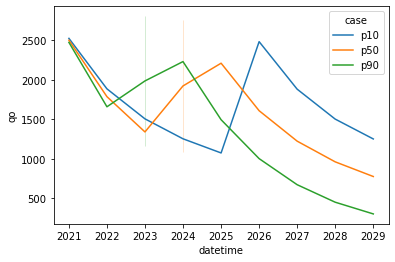

In [7]:
sns.lineplot(data=f1, x='datetime', y='qo', hue='case')

In [8]:
s,n=pr1.get_fcf(cases=['p10','p90'],prate=[0,5,10,15],pyr=12)
print(s)
print(n)

      total_income  total_opex  total_capex  net_income  free_cash_flow  \
2021    46076.0735  -9215.2147      -4000.0  36860.8588      32860.8588   
2022    34410.5720  -6882.1144          0.0  27528.4576      27528.4576   
2023    27474.3800  -5494.8760          0.0  21979.5040      21979.5040   
2024    22928.4635  -4585.6927          0.0  18342.7708      18342.7708   
2025    19483.0650  -3896.6130          0.0  15586.4520      15586.4520   
2026    41967.2530  -8393.4506       -400.0  33573.8024      33173.8024   
2027    34339.2425  -6867.8485          0.0  27471.3940      27471.3940   
2028    27497.0560  -5499.4112          0.0  21997.6448      21997.6448   
2029    22828.8705  -4565.7741          0.0  18263.0964      18263.0964   
2021    45149.6755  -9029.9351      -4000.0  36119.7404      32119.7404   
2022    30264.7330  -6052.9466          0.0  24211.7864      24211.7864   
2023    24837.5485  -4967.5097       -400.0  19870.0388      19470.0388   
2024    40820.8860  -8164

In [9]:
pr1.get_fcf(cases='p10',prate=[0,5,10,15],pyr=12)

(      total_income  total_opex  total_capex  net_income  free_cash_flow  \
 2021    46076.0735  -9215.2147      -4000.0  36860.8588      32860.8588   
 2022    34410.5720  -6882.1144          0.0  27528.4576      27528.4576   
 2023    27474.3800  -5494.8760          0.0  21979.5040      21979.5040   
 2024    22928.4635  -4585.6927          0.0  18342.7708      18342.7708   
 2025    19483.0650  -3896.6130          0.0  15586.4520      15586.4520   
 2026    41967.2530  -8393.4506       -400.0  33573.8024      33173.8024   
 2027    34339.2425  -6867.8485          0.0  27471.3940      27471.3940   
 2028    27497.0560  -5499.4112          0.0  21997.6448      21997.6448   
 2029    22828.8705  -4565.7741          0.0  18263.0964      18263.0964   
 
       cum_free_cash_flow case  well  
 2021          32860.8588  p10  pr-1  
 2022          60389.3164  p10  pr-1  
 2023          82368.8204  p10  pr-1  
 2024         100711.5912  p10  pr-1  
 2025         116298.0432  p10  pr-1  
 202

## Group wells

In [10]:
w1 = ph.well(name='w1')
w2 = ph.well(name='w2')
w3 = ph.well(name='w3')

gr1 = ph.wells_group(w1,w2,w3)
gr1.wells

{'w1': <reservoirpy.wellpy.path.wells.well at 0x7f9804462b20>,
 'w2': <reservoirpy.wellpy.path.wells.well at 0x7f9804462ac0>,
 'w3': <reservoirpy.wellpy.path.wells.well at 0x7f9804462220>}

In [11]:

w1p90 = {
    'initial':{
        'declination':dc.declination(qi=2000, b=0, di=0.4, ti=date(2021,1,1),
                                     econ_limit=100, fluid_rate=2500),
        'start_date':date(2021,3,1),
        'end_date':date(2030,1,1),
        'capex':-4000,
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    }
}
w1p10 = {
    'initial':{
        'declination':dc.declination(qi=2000, b=1, di=0.4, ti=date(2021,1,1),
                                     econ_limit=100, fluid_rate=2500),
        'start_date':date(2021,3,1),
        'end_date':date(2030,1,1),
        'capex':-3500,
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    }
}

gr1.wells['w1'].add_schedule(
    {
        'p90':w1p90,
        'p10':w1p10
    }
)

In [12]:
w2p90 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0, di=0.4, ti=date(2021,1,1),
                                     econ_limit=100, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-4000,
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    }
}
w2p10 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=1, di=0.4, ti=date(2021,1,1),
                                     econ_limit=100, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-4000,
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    }
}

gr1.wells['w2'].add_schedule(
    {
        'p90':w2p90,
        'p10':w2p10
    }
)

In [13]:
w3p90 = {
    'initial':{
        'declination':dc.declination(qi=4000, b=0, di=0.4, ti=date(2021,1,1),
                                     econ_limit=100, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-4000,
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    }
}
w3p10 = {
    'initial':{
        'declination':dc.declination(qi=4000, b=1, di=0.25, ti=date(2021,1,1),
                                     econ_limit=100, fluid_rate=2500),
        'start_date':date(2021,1,1),
        'end_date':date(2030,1,1),
        'capex':-4000,
        'oil_price':price,
        'var_oil_opex':-10/1000,
        'fix_opex': -15
    }
}

gr1.wells['w3'].add_schedule(
    {
        'p90':w3p90,
        'p10':w3p10
    }
)

## Get individual forecast

In [14]:
gr1.wells['w2'].schedule_forecast(fq_output='A')

,case,period,time,qo,vo,np,datetime,well
0,p10,initial,2021,2524.716356,921521.47,921521.45,2021-01-01,w2
1,p10,initial,2022,1885.510795,688211.44,1609732.85,2022-01-01,w2
2,p10,initial,2023,1505.445479,549487.60,2159220.42,2023-01-01,w2
3,p10,initial,2024,1252.921503,458569.27,2617789.74,2024-01-01,w2
4,p10,initial,2025,1073.045671,391661.67,3009451.38,2025-01-01,w2
5,p10,initial,2026,938.562575,342575.34,3352026.67,2026-01-01,w2
6,p10,initial,2027,834.064986,304433.72,3656460.41,2027-01-01,w2
7,p10,initial,2028,750.423798,274655.11,3931115.39,2028-01-01,w2
8,p10,initial,2029,682.033041,248942.06,4180057.50,2029-01-01,w2
9,p90,initial,2021,2473.954822,902993.51,902993.48,2021-01-01,w2


In [15]:
gr1.wells['w3'].schedule_forecast(cases=['p90'],fq_output='A')

,case,period,time,qo,vo,np,datetime,well
0,p90,initial,2021,3298.606110,1203991.23,1203991.31,2021-01-01,w3
1,p90,initial,2022,2211.121616,807059.39,2011050.82,2022-01-01,w3
2,p90,initial,2023,1482.159425,540988.19,2552038.99,2023-01-01,w3
3,p90,initial,2024,993.012869,363442.71,2915481.79,2024-01-01,w3
4,p90,initial,2025,665.247616,242815.38,3158297.20,2025-01-01,w3
5,p90,initial,2026,445.928877,162764.04,3321061.24,2026-01-01,w3
6,p90,initial,2027,298.914932,109103.95,3430165.23,2027-01-01,w3
7,p90,initial,2028,200.266148,73297.41,3503462.70,2028-01-01,w3
8,p90,initial,2029,134.164082,48969.89,3552432.59,2029-01-01,w3


## Group forecast

If no case is passed. It return all case of all wells

In [16]:
gr1.schedule_forecast(fq_output='A')

,case,period,time,qo,vo,np,datetime,well
0,p10,initial,2021,1633.806634,499944.83,499944.82,2021-01-01,w1
1,p10,initial,2022,1257.007014,458807.56,958752.42,2022-01-01,w1
2,p10,initial,2023,1003.630301,366325.06,1325077.47,2023-01-01,w1
3,p10,initial,2024,835.280956,305712.83,1630790.35,2024-01-01,w1
4,p10,initial,2025,715.364055,261107.88,1891898.11,2025-01-01,w1
5,p10,initial,2026,625.708137,228383.47,2120281.64,2026-01-01,w1
6,p10,initial,2027,556.043452,202955.86,2323237.46,2027-01-01,w1
7,p10,initial,2028,500.282268,183103.31,2506340.78,2028-01-01,w1
8,p10,initial,2029,454.688877,165961.44,2672302.19,2029-01-01,w1
9,p90,initial,2021,1593.682614,487666.88,487666.92,2021-01-01,w1


## Choose wells with all caso

In [17]:
gr1.schedule_forecast(wells=['w1','w3'],fq_output='A')

,case,period,time,qo,vo,np,datetime,well
0,p10,initial,2021,1633.806634,499944.83,499944.82,2021-01-01,w1
1,p10,initial,2022,1257.007014,458807.56,958752.42,2022-01-01,w1
2,p10,initial,2023,1003.630301,366325.06,1325077.47,2023-01-01,w1
3,p10,initial,2024,835.280956,305712.83,1630790.35,2024-01-01,w1
4,p10,initial,2025,715.364055,261107.88,1891898.11,2025-01-01,w1
5,p10,initial,2026,625.708137,228383.47,2120281.64,2026-01-01,w1
6,p10,initial,2027,556.043452,202955.86,2323237.46,2027-01-01,w1
7,p10,initial,2028,500.282268,183103.31,2506340.78,2028-01-01,w1
8,p10,initial,2029,454.688877,165961.44,2672302.19,2029-01-01,w1
9,p90,initial,2021,1593.682614,487666.88,487666.92,2021-01-01,w1


## Choose both case and wells

In [18]:
gr1.schedule_forecast(cases='p10',wells=['w1','w3'],fq_output='A')

,case,period,time,qo,vo,np,datetime,well
0,p10,initial,2021,1633.806634,499944.83,499944.82,2021-01-01,w1
1,p10,initial,2022,1257.007014,458807.56,958752.42,2022-01-01,w1
2,p10,initial,2023,1003.630301,366325.06,1325077.47,2023-01-01,w1
3,p10,initial,2024,835.280956,305712.83,1630790.35,2024-01-01,w1
4,p10,initial,2025,715.364055,261107.88,1891898.11,2025-01-01,w1
5,p10,initial,2026,625.708137,228383.47,2120281.64,2026-01-01,w1
6,p10,initial,2027,556.043452,202955.86,2323237.46,2027-01-01,w1
7,p10,initial,2028,500.282268,183103.31,2506340.78,2028-01-01,w1
8,p10,initial,2029,454.688877,165961.44,2672302.19,2029-01-01,w1
0,p10,initial,2021,3571.392932,1303558.42,1303558.42,2021-01-01,w3


In [19]:
gr1.schedule_forecast(cases=['p10','p90'],wells=['w1','w3'],fq_output='A')

,case,period,time,qo,vo,np,datetime,well
0,p10,initial,2021,1633.806634,499944.83,499944.82,2021-01-01,w1
1,p10,initial,2022,1257.007014,458807.56,958752.42,2022-01-01,w1
2,p10,initial,2023,1003.630301,366325.06,1325077.47,2023-01-01,w1
3,p10,initial,2024,835.280956,305712.83,1630790.35,2024-01-01,w1
4,p10,initial,2025,715.364055,261107.88,1891898.11,2025-01-01,w1
5,p10,initial,2026,625.708137,228383.47,2120281.64,2026-01-01,w1
6,p10,initial,2027,556.043452,202955.86,2323237.46,2027-01-01,w1
7,p10,initial,2028,500.282268,183103.31,2506340.78,2028-01-01,w1
8,p10,initial,2029,454.688877,165961.44,2672302.19,2029-01-01,w1
9,p90,initial,2021,1593.682614,487666.88,487666.92,2021-01-01,w1


## Choose which case of each well to return

In [20]:
case_dict = {
    'w1':'p90',
    'w3':['p10','p90']
}

gr1.schedule_forecast(cases=case_dict,wells=['w1','w3'],fq_output='A')

,case,period,time,qo,vo,np,datetime,well
0,p90,initial,2021,1593.682614,487666.88,487666.92,2021-01-01,w1
1,p90,initial,2022,1105.560959,403529.75,891196.68,2022-01-01,w1
2,p90,initial,2023,741.079616,270494.06,1161690.76,2023-01-01,w1
3,p90,initial,2024,496.506694,181721.45,1343412.16,2024-01-01,w1
4,p90,initial,2025,332.623699,121407.65,1464819.87,2025-01-01,w1
5,p90,initial,2026,222.964685,81382.11,1546201.88,2026-01-01,w1
6,p90,initial,2027,149.457781,54552.09,1600753.88,2027-01-01,w1
7,p90,initial,2028,110.491469,19556.99,1620310.82,2028-01-01,w1
0,p10,initial,2021,3571.392932,1303558.42,1303558.42,2021-01-01,w3
1,p10,initial,2022,2917.875671,1065024.62,2368583.02,2022-01-01,w3


In [21]:
case_dict = {
    'w1':'p90',
    'w3':['p10','p90']
}

gr1.schedule_forecast(
    cases=case_dict,
    wells=['w1','w3'],
    fq_output='A',
    start_date=date(2024,4,4)
)

,case,period,time,qo,vo,np,datetime,well
0,p90,initial,2024,470.170441,127886.36,1343412.16,2024-01-01,w1
1,p90,initial,2025,332.623699,121407.65,1464819.87,2025-01-01,w1
2,p90,initial,2026,222.964685,81382.11,1546201.88,2026-01-01,w1
3,p90,initial,2027,149.457781,54552.09,1600753.88,2027-01-01,w1
4,p90,initial,2028,110.491469,19556.99,1620310.82,2028-01-01,w1
0,p10,initial,2024,2098.994301,570926.45,4050979.71,2024-01-01,w3
1,p10,initial,2025,1884.224219,687741.84,4738721.53,2025-01-01,w3
2,p10,initial,2026,1685.524740,615216.53,5353938.07,2026-01-01,w3
3,p10,initial,2027,1524.763781,556538.78,5910476.80,2027-01-01,w3
4,p10,initial,2028,1391.854508,509418.75,6419895.66,2028-01-01,w3


In [22]:
sce1 = gr1.scenarios_maker(reduce=1)
sce1

[{'w1': 'p90', 'w2': 'p90', 'w3': 'p90'},
 {'w1': 'p10', 'w2': 'p90', 'w3': 'p90'},
 {'w1': 'p90', 'w2': 'p10', 'w3': 'p90'},
 {'w1': 'p10', 'w2': 'p10', 'w3': 'p90'},
 {'w1': 'p90', 'w2': 'p90', 'w3': 'p10'},
 {'w1': 'p10', 'w2': 'p90', 'w3': 'p10'},
 {'w1': 'p90', 'w2': 'p10', 'w3': 'p10'},
 {'w1': 'p10', 'w2': 'p10', 'w3': 'p10'}]

In [23]:
sim = gr1.scenarios_forecast(scenarios=sce1,fq_output='A')
sim

,case,period,time,qo,vo,np,datetime,well,scenario
0,p90,initial,2021,1593.682614,487666.88,487666.92,2021-01-01,w1,0
1,p90,initial,2022,1105.560959,403529.75,891196.68,2022-01-01,w1,0
2,p90,initial,2023,741.079616,270494.06,1161690.76,2023-01-01,w1,0
3,p90,initial,2024,496.506694,181721.45,1343412.16,2024-01-01,w1,0
4,p90,initial,2025,332.623699,121407.65,1464819.87,2025-01-01,w1,0
...,...,...,...,...,...,...,...,...,...
4,p10,initial,2025,1884.224219,687741.84,4738721.53,2025-01-01,w3,7
5,p10,initial,2026,1685.524740,615216.53,5353938.07,2026-01-01,w3,7
6,p10,initial,2027,1524.763781,556538.78,5910476.80,2027-01-01,w3,7
7,p10,initial,2028,1391.854508,509418.75,6419895.66,2028-01-01,w3,7


<AxesSubplot:xlabel='datetime', ylabel='qo'>

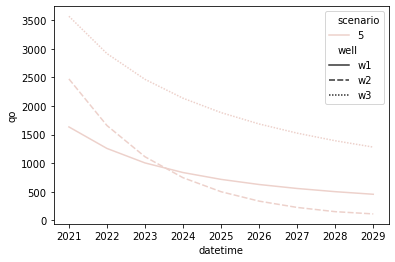

In [24]:
sns.lineplot(data=sim[sim['scenario']==5],x='datetime',y='qo', hue='scenario',style='well')

In [25]:
simgr = sim.groupby(['scenario','datetime'])['qo'].sum().reset_index()
simgr

,scenario,datetime,qo
0,0,2021-01-01,7366.243546
1,0,2022-01-01,4975.024110
2,0,2023-01-01,3334.858521
3,0,2024-01-01,2234.279344
4,0,2025-01-01,1496.806986
...,...,...,...
67,7,2025-01-01,3672.633945
68,7,2026-01-01,3249.795452
69,7,2027-01-01,2914.872219
70,7,2028-01-01,2642.560574


<AxesSubplot:xlabel='datetime', ylabel='qo'>

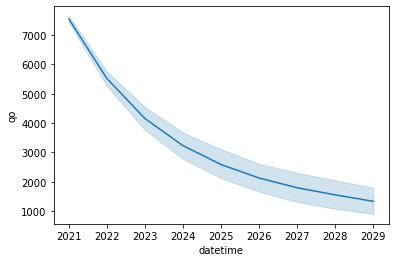

In [26]:
sns.lineplot(data=simgr, x='datetime',y='qo')

# Get Cashflows

In [27]:
s=gr1.get_cashflow(case='p90',cash_name='income')
s

,income_w1,income_w2,income_w3,total
2021,24383.3440,45149.6755,60199.5615,129732.5810
2022,20176.4875,30264.7330,40352.9695,90794.1900
2023,13524.7030,20287.0555,27049.4095,60861.1680
2024,9086.0725,13629.1040,18172.1355,40887.3120
2025,6070.3825,9105.5760,12140.7690,27316.7275
2026,4069.1055,6103.6540,8138.2020,18310.9615
2027,2727.6045,4091.3955,5455.1975,12274.1975
2028,977.8495,2748.6535,3664.8705,7391.3735
2029,0.0000,1002.1935,2448.4945,3450.6880


In [31]:
gr1.get_fcf(wells=['w1'],cases='p90',prate=[0,5])

(       total_income  total_opex  total_capex  net_income  free_cash_flow  \
 index                                                                      
 2021     24383.3440  -4876.6688      -4000.0  19506.6752      15506.6752   
 2022     20176.4875  -4035.2975          0.0  16141.1900      16141.1900   
 2023     13524.7030  -2704.9406          0.0  10819.7624      10819.7624   
 2024      9086.0725  -1817.2145          0.0   7268.8580       7268.8580   
 2025      6070.3825  -1214.0765          0.0   4856.3060       4856.3060   
 2026      4069.1055   -813.8211          0.0   3255.2844       3255.2844   
 2027      2727.6045   -545.5209          0.0   2182.0836       2182.0836   
 2028       977.8495   -195.5699          0.0    782.2796        782.2796   
 
        cum_free_cash_flow  
 index                      
 2021           15506.6752  
 2022           31647.8652  
 2023           42467.6276  
 2024           49736.4856  
 2025           54592.7916  
 2026           57848.076

In [29]:
d,_ = gr1.wells['w1'].get_fcf(cases='p90')
d

,total_income,total_opex,total_capex,net_income,free_cash_flow,cum_free_cash_flow,case,well
2021,24383.3440,-4876.6688,-4000.0,19506.6752,15506.6752,15506.6752,p90,w1
2022,20176.4875,-4035.2975,0.0,16141.1900,16141.1900,31647.8652,p90,w1
2023,13524.7030,-2704.9406,0.0,10819.7624,10819.7624,42467.6276,p90,w1
2024,9086.0725,-1817.2145,0.0,7268.8580,7268.8580,49736.4856,p90,w1
2025,6070.3825,-1214.0765,0.0,4856.3060,4856.3060,54592.7916,p90,w1
2026,4069.1055,-813.8211,0.0,3255.2844,3255.2844,57848.0760,p90,w1
2027,2727.6045,-545.5209,0.0,2182.0836,2182.0836,60030.1596,p90,w1
2028,977.8495,-195.5699,0.0,782.2796,782.2796,60812.4392,p90,w1
